# Smart Predictive Modeling for Rental Property Prices

In [1]:
#import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')
pd.set_option('display.max_rows', 200)

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline

In [3]:
data=pd.read_excel(r"C:\Users\vijiv\OneDrive\Desktop\GUVI notes\excel file\House_Rent_Train.xlsx")


In [4]:
data.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [5]:
data.shape

(20555, 25)

# Data preparation

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [7]:
data.isna().sum()#To check Nan value 

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [8]:
data1=data.dropna()#drop the null value

In [9]:
data1.isna().sum()#now the value in zero so we removed null value

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [10]:
data1.duplicated().sum()#this is to check duplicate value in the dataset

20

In [11]:
data1 = data1.drop_duplicates() #we are dropping the duplicate values

In [12]:
data1.shape   # rows and columns of the dataset

(20357, 25)

In [13]:
data1.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000,20357.000000
mean,12.945749,77.637238,0.226359,0.361006,0.174633,0.711401,1061.571253,5.776244,1.857887,4.570222,1.869382,3.798595,1.147615,19049.434838
std,0.029582,0.110805,0.418485,0.480304,0.379662,0.453122,591.873599,6.360285,0.710982,336.592272,2.182070,3.185034,0.993529,8433.565460
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918242,77.571891,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943792,77.633367,0.000000,0.000000,0.000000,1.000000,1045.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970914,77.695707,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


<Axes: >

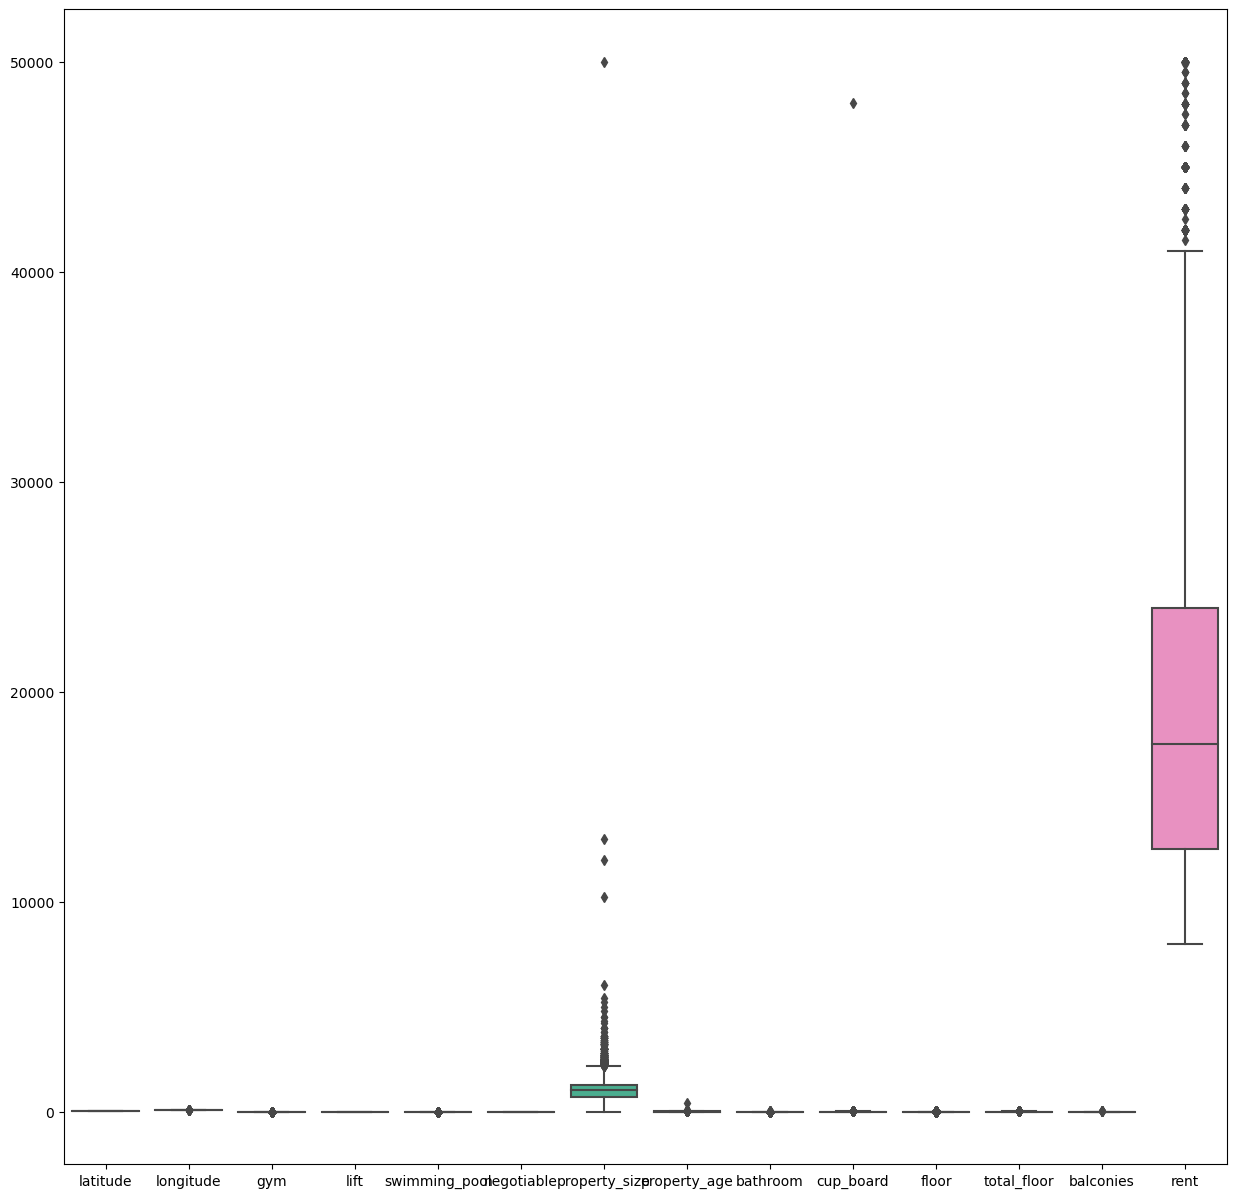

In [14]:
plt.figure(figsize=(15,15))#this boxplot is maintly us to check the outliers
sns.boxplot(data1)

<Axes: xlabel='rent'>

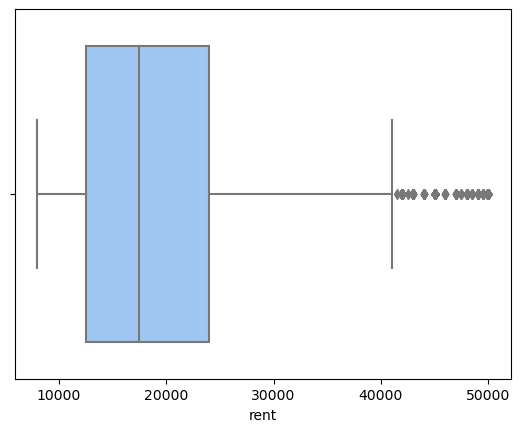

In [15]:
sns.boxplot(x = 'rent', data = data1)

In [16]:
#To remove outliers we use specific column in a dataframe using the IRQ method
def remove_outliers(data1, column_name):

    # Calculate the first and third quartiles
    Q1 = data1[column_name].quantile(0.25)
    Q3 = data1[column_name].quantile(0.75)

#Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Remove outliers
    data_no_outliers = data1[(data1[column_name] >= lower_bound) & (data1[column_name] <= upper_bound)]

    return data_no_outliers


In [17]:
data1=remove_outliers(data1,'rent')
data1=remove_outliers(data1,'property_size')

In [18]:
data1.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [19]:
data1.shape

(19570, 25)

In [20]:
# to check how much percentage is reduced from original data by removing outliers
c = round(((data.shape[0] - data1.shape[0]) / data.shape[0])*100 , 3)
print(f'Removed Outliers which consisted of {c} % of the orignal data')

Removed Outliers which consisted of 4.792 % of the orignal data


In [21]:
from sklearn.model_selection import train_test_split
X=data1.drop(['rent'],axis=1)
y=data1['rent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
train_data=X_train.join(y_train)

In [25]:
train_data

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
6382,ff80818163c52cdb0163cb47790218bf,BHK2,New Tippasandra,2018-05-06 18:02:00,12.972959,77.655787,FAMILY,0,0,0,...,2.0,N,0.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2.0,15000.0
14027,ff80818164a363450164a3d226801bfe,BHK2,"Uttarahalli Hobli,",16-07-2018 22:21,12.908731,77.548584,FAMILY,0,0,0,...,1.0,E,2.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORP_BORE,IH,0.0,16000.0
15924,ff8081816006b7f1016006da9bd9059e,BHK2,Vijaya Nagar,29-11-2017 15:17,12.975548,77.531389,FAMILY,0,0,0,...,1.0,N,2.0,0.0,2.0,"{""PARK"":false,""HK"":false,""LIFT"":false,""PB"":fal...",CORPORATION,IF,0.0,18000.0
12239,ff8081815b15c304015b1a6133455383,BHK2,Uttarahalli Hobli,19-09-2017 15:12,12.904746,77.553595,ANYONE,0,0,0,...,2.0,N,2.0,1.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IF,2.0,14000.0
17154,ff8081815f3dc25e015f3e30436a349a,BHK2,Kumaraswamy Layout,20-04-2018 17:02,12.908183,77.562454,ANYONE,0,0,0,...,1.0,E,1.0,2.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,ff8081816104540a0161049ab3e60f0c,BHK1,RR Nagar,17-01-2018 21:48,12.919747,77.515315,FAMILY,0,0,0,...,1.0,E,1.0,2.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.0,9500.0
12256,ff80818159a681f10159aadd1f6f0370,BHK2,Whitefield,2017-12-12 16:28:00,12.979163,77.752210,FAMILY,0,0,0,...,2.0,E,2.0,2.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,14000.0
6956,ff8081815fcf9c0a015fd7f16a542079,BHK3,Rajaji Nagar,20-11-2017 12:58,12.987950,77.549151,FAMILY,0,0,0,...,2.0,E,3.0,1.0,3.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IF,3.0,32000.0
11063,ff80818160ac07ec0160b09cd8397593,BHK2,Mahadevapura,2018-01-01 14:02:00,12.990535,77.670389,FAMILY,0,0,0,...,2.0,E,2.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,0.0,13000.0


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'gym'}>,
        <Axes: title={'center': 'lift'}>],
       [<Axes: title={'center': 'swimming_pool'}>,
        <Axes: title={'center': 'negotiable'}>,
        <Axes: title={'center': 'property_size'}>,
        <Axes: title={'center': 'property_age'}>],
       [<Axes: title={'center': 'bathroom'}>,
        <Axes: title={'center': 'cup_board'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'total_floor'}>],
       [<Axes: title={'center': 'balconies'}>,
        <Axes: title={'center': 'rent'}>, <Axes: >, <Axes: >]],
      dtype=object)

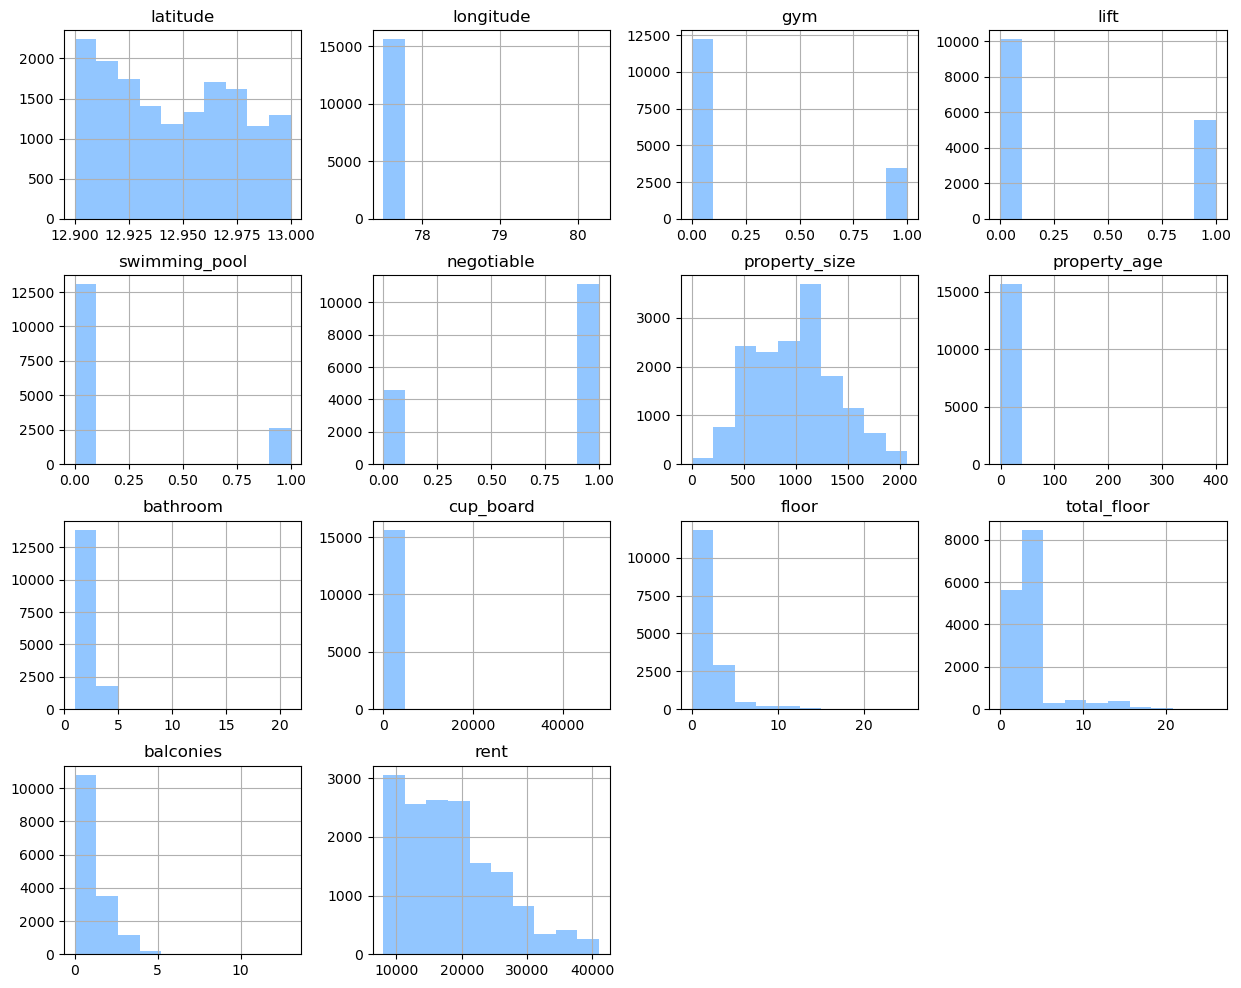

In [26]:
train_data.hist(figsize=(15,12))# histogram of the entire dataset

In [27]:
train_data.corr()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
latitude,1.000000,0.196716,0.035628,0.022451,0.035717,-0.017424,0.031674,0.030627,0.004592,-0.003626,0.006812,-0.001425,0.055288,0.048402
longitude,0.196716,1.000000,0.238493,0.207236,0.220104,-0.025099,0.103435,-0.130126,0.095274,-0.004749,0.149633,0.199875,0.162985,0.176959
gym,0.035628,0.238493,1.000000,0.649810,0.762339,0.006426,0.409375,-0.174281,0.322602,-0.003262,0.387146,0.521635,0.410642,0.446565
lift,0.022451,0.207236,0.649810,1.000000,0.567619,0.013762,0.481355,-0.177250,0.393098,-0.004707,0.397333,0.527502,0.533400,0.502826
swimming_pool,0.035717,0.220104,0.762339,0.567619,1.000000,0.007376,0.388489,-0.164948,0.309378,-0.002714,0.430873,0.570945,0.377190,0.444225
negotiable,-0.017424,-0.025099,0.006426,0.013762,0.007376,1.000000,0.062942,0.035590,0.056325,0.005325,-0.006837,0.000505,0.030073,0.065007
property_size,0.031674,0.103435,0.409375,0.481355,0.388489,0.062942,1.000000,-0.017294,0.732502,-0.004505,0.213861,0.329264,0.516534,0.744047
property_age,0.030627,-0.130126,-0.174281,-0.177250,-0.164948,0.035590,-0.017294,1.000000,-0.053294,0.005037,-0.186413,-0.227457,-0.113675,-0.017275
bathroom,0.004592,0.095274,0.322602,0.393098,0.309378,0.056325,0.732502,-0.053294,1.000000,-0.008068,0.169334,0.264090,0.441588,0.640049
cup_board,-0.003626,-0.004749,-0.003262,-0.004707,-0.002714,0.005325,-0.004505,0.005037,-0.008068,1.000000,-0.002723,-0.003875,-0.007892,-0.001786


<Axes: >

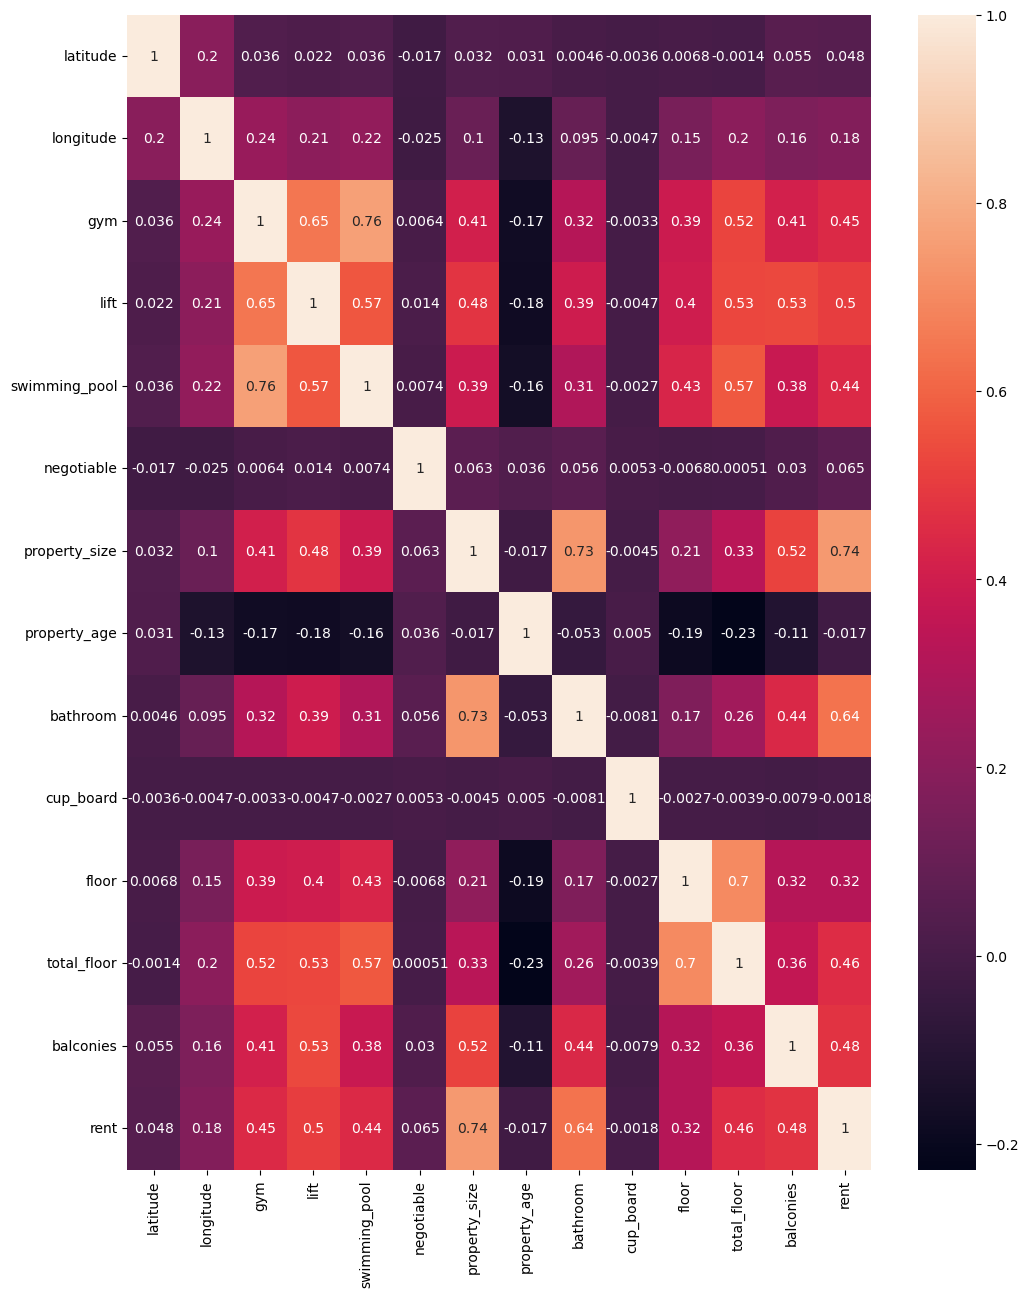

In [28]:
plt.figure(figsize=(12,15))
sns.heatmap(train_data.corr(),annot=True)


In [29]:
train_data['amenities'].unique()

array(['{"LIFT":false,"GYM":false,"INTERNET":true,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}',
       '{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}',
       '{"PARK":false,"HK":false,"LIFT":false,"PB":false,"INTERNET":false,"GYM":false,"FS":false,"SECURITY":false,"INTERCOM":false,"POOL":false,"AC":false,"SC":false}',
       ...,
       '{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":false,"POOL":true,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":false,"GP":false,"PARK":false,"RWH":true,"STP":false,"HK":false,"PB":false,"VP":false}',
       '{"PARK":true,"HK":true,"LIFT":true,"PB":true,"INTERN

In [30]:
train_data.amenities.nunique()

4055

In [31]:
train_data.locality.nunique()

1627

In [62]:
train_data.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [63]:
train_data1=train_data.drop(["id","activation_date","amenities","locality"],axis=1)

# Exploratory Data Analysis

# univarient

In [64]:
train_data1["type"]=train_data1["type"].str.upper()

In [65]:
train_data1["type"]=train_data1["type"].str.replace(r'RK1','BHK1',regex=True)
train_data1["type"]=train_data1["type"].str.replace(r'1BHK1','BHK1',regex=True)
train_data1["type"]=train_data1["type"].str.replace(r'BHK4PLUS','BHK5',regex=True)

(0.0, 15000.0)

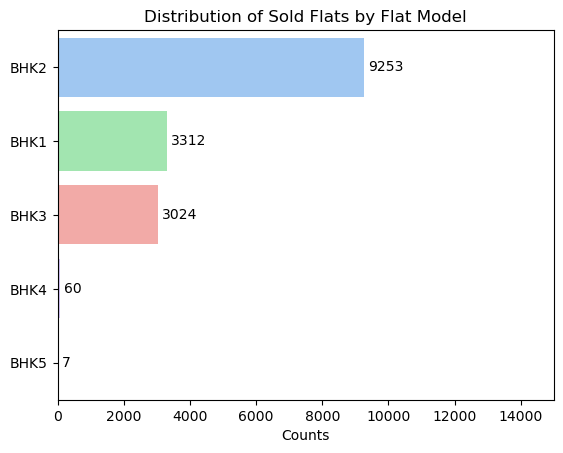

In [66]:
ax=sns.barplot(y=train_data1['type'].value_counts().index, x=train_data1['type'].value_counts().values)
plt.title('Distribution of Sold Flats by Flat Model')
plt.xlabel('Counts')
ax.bar_label(ax.containers[0], label_type='edge', padding= 3)
ax.set_xlim(0, 15000)

Text(0.5, 0, 'type')

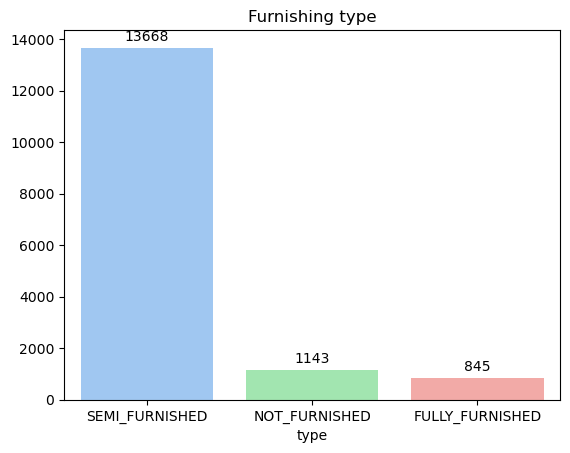

In [37]:
bx=sns.barplot(x=train_data1['furnishing'].value_counts().index, y=train_data1['furnishing'].value_counts().values)
plt.title('Furnishing type')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('type')

Text(0.5, 0, 'type')

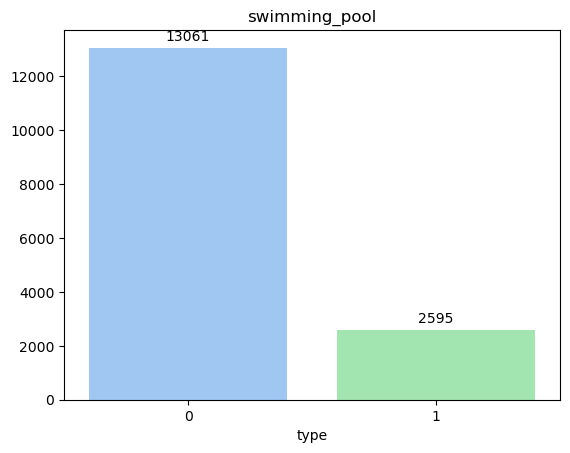

In [38]:
bx=sns.barplot(x=train_data1['swimming_pool'].value_counts().index, y=train_data1['swimming_pool'].value_counts().values)
plt.title('swimming_pool')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('type')

Text(0.5, 0, 'value')

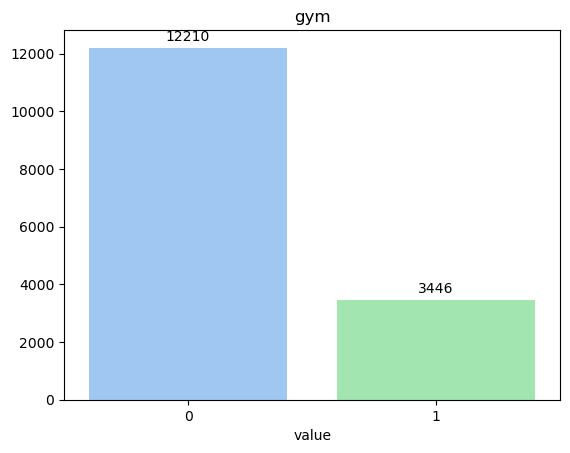

In [39]:
bx=sns.barplot(x=train_data1['gym'].value_counts().index, y=train_data1['gym'].value_counts().values)
plt.title('gym')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

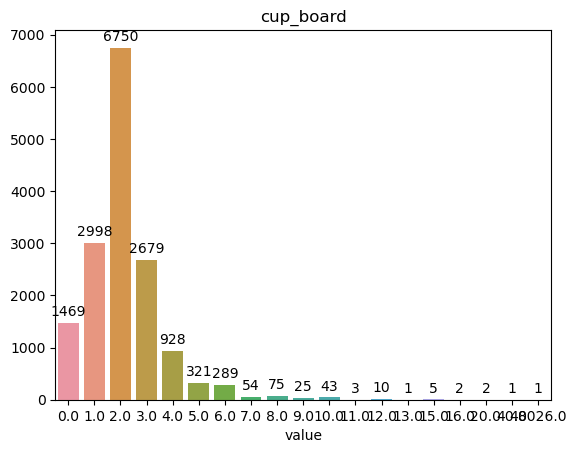

In [40]:
bx=sns.barplot(x=train_data1['cup_board'].value_counts().index, y=train_data1['cup_board'].value_counts().values)
plt.title('cup_board')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

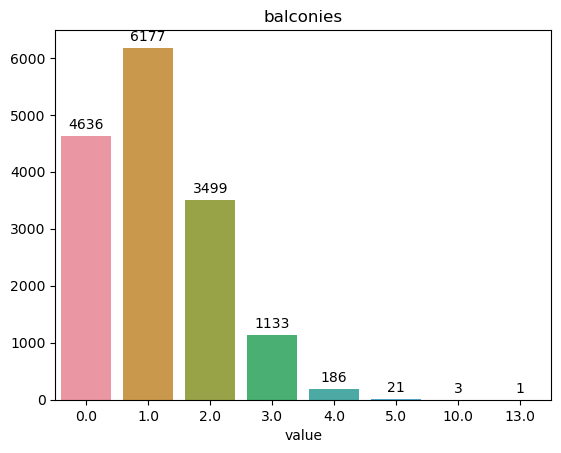

In [41]:
bx=sns.barplot(x=train_data1['balconies'].value_counts().index, y=train_data1['balconies'].value_counts().values)
plt.title('balconies')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

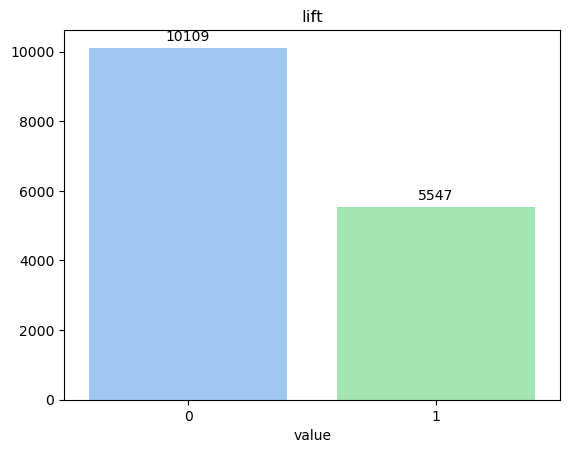

In [42]:
bx=sns.barplot(x=train_data1['lift'].value_counts().index, y=train_data1['lift'].value_counts().values)
plt.title('lift')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

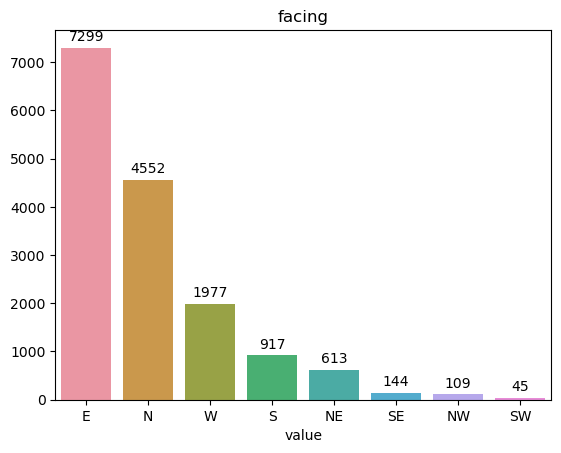

In [43]:
bx=sns.barplot(x=train_data1['facing'].value_counts().index, y=train_data1['facing'].value_counts().values)
plt.title('facing')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

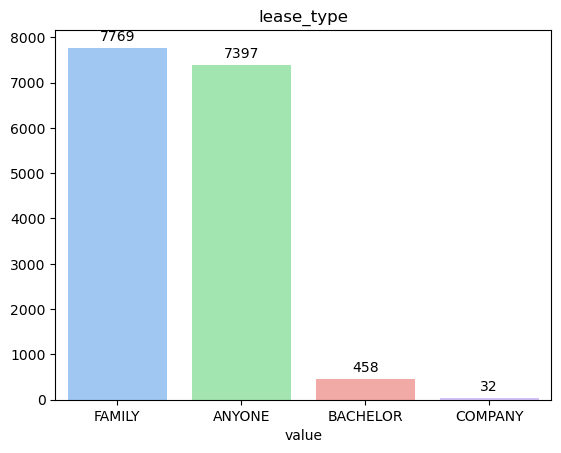

In [44]:
bx=sns.barplot(x=train_data1['lease_type'].value_counts().index, y=train_data1['lease_type'].value_counts().values)
plt.title('lease_type')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

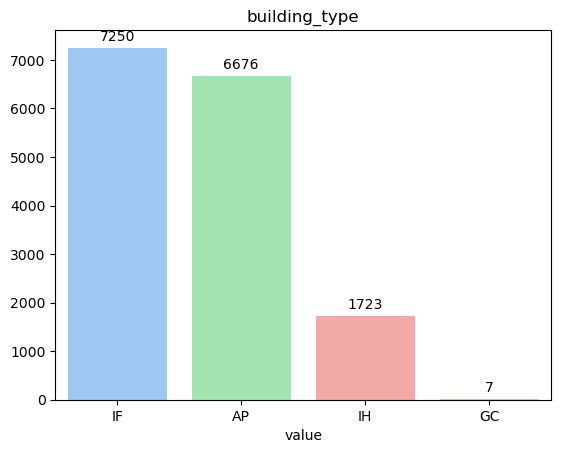

In [45]:
bx=sns.barplot(x=train_data1['building_type'].value_counts().index, y=train_data1['building_type'].value_counts().values)
plt.title('building_type')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

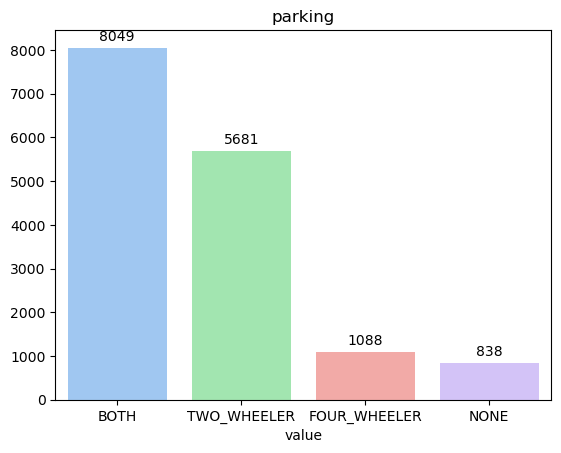

In [46]:
bx=sns.barplot(x=train_data1['parking'].value_counts().index, y=train_data1['parking'].value_counts().values)
plt.title('parking')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'value')

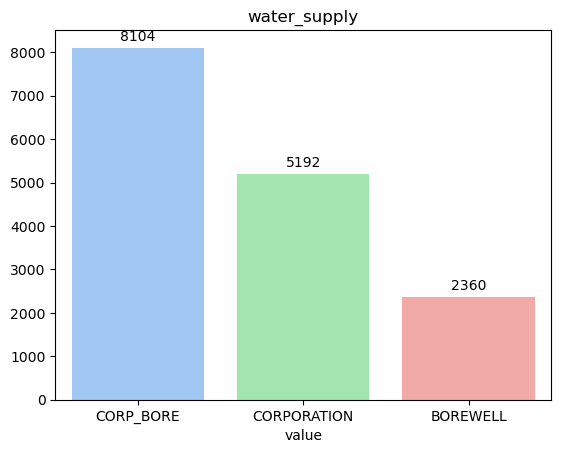

In [47]:
bx=sns.barplot(x=train_data1['water_supply'].value_counts().index, y=train_data1['water_supply'].value_counts().values)
plt.title('water_supply')
bx.bar_label(bx.containers[0], label_type='edge', padding= 3)
plt.xlabel('value')

Text(0.5, 0, 'Age of Flat (Years)')

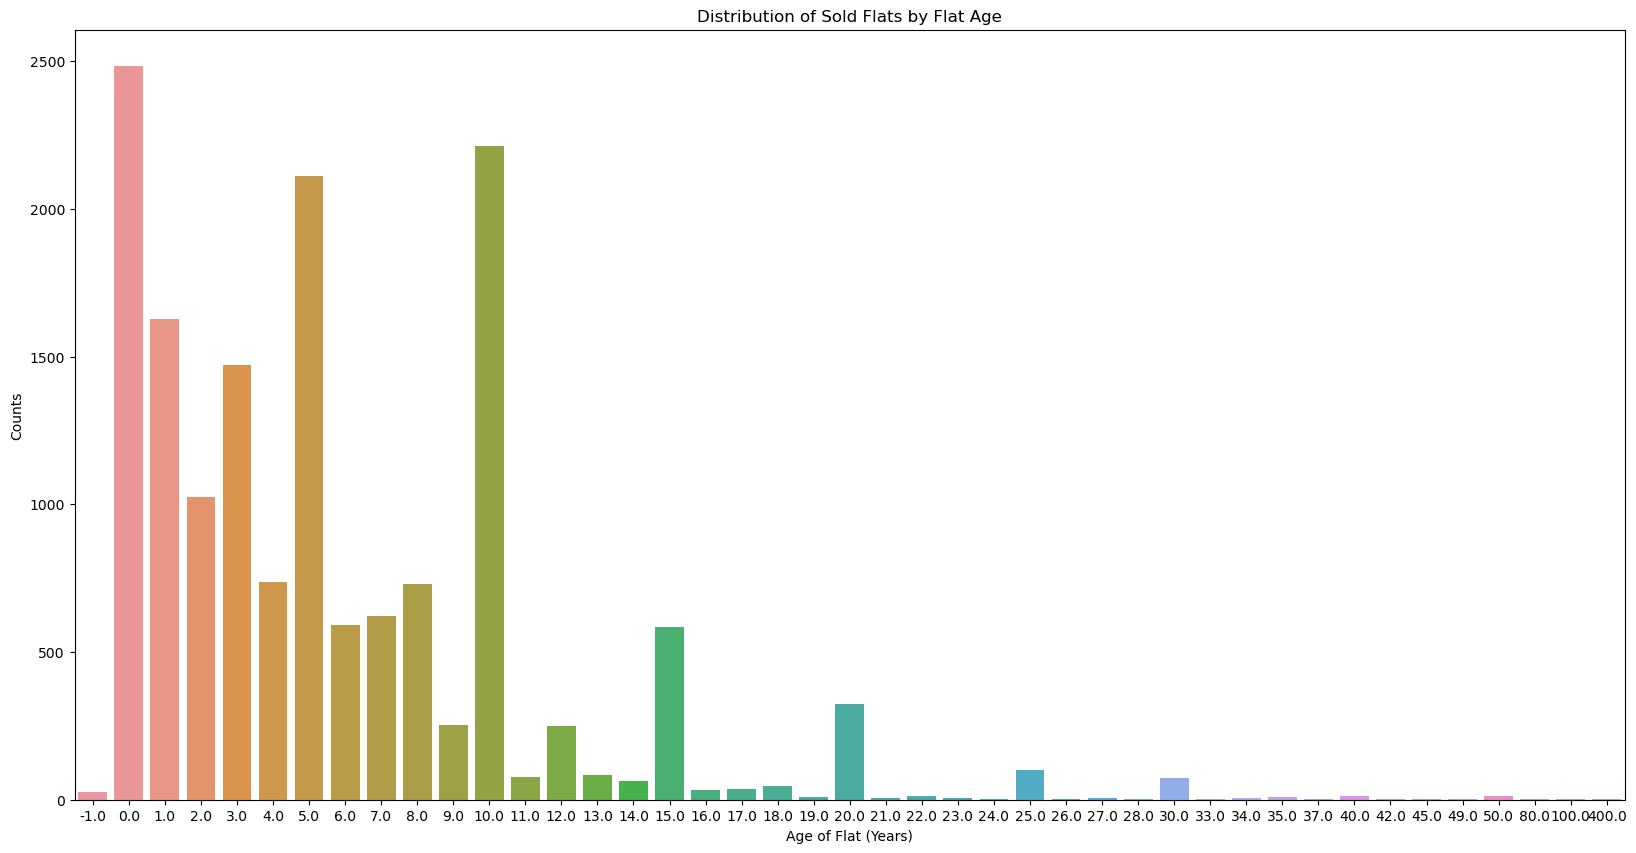

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_data1['property_age'].value_counts().sort_index().index, y=train_data1['property_age'].value_counts().sort_index().values)
plt.title('Distribution of Sold Flats by Flat Age')
plt.ylabel('Counts')
plt.xlabel('Age of Flat (Years)')

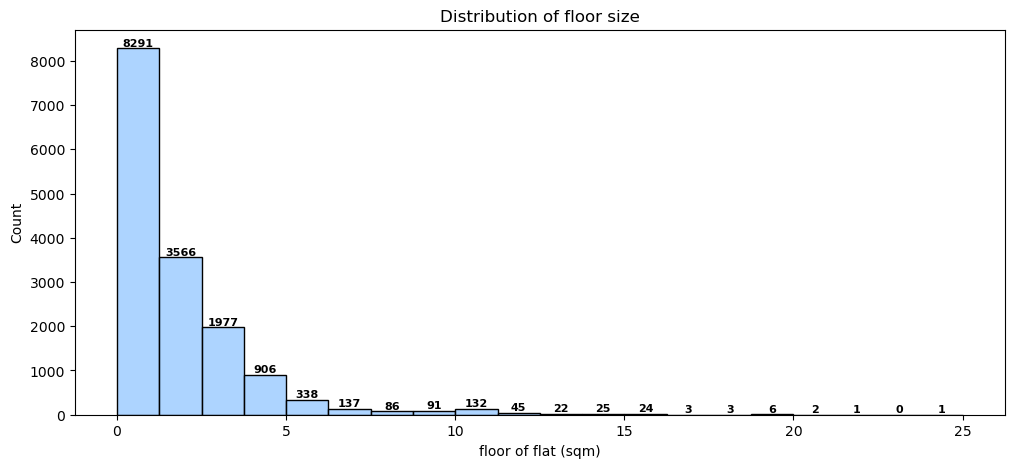

In [49]:
plt.figure(figsize=(12,5))
ax = sns.histplot(data=train_data1, x= 'floor',bins=20,stat='count')
plt.title('Distribution of floor size')
plt.xlabel('floor of flat (sqm)')
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontsize=8, fontweight='bold')

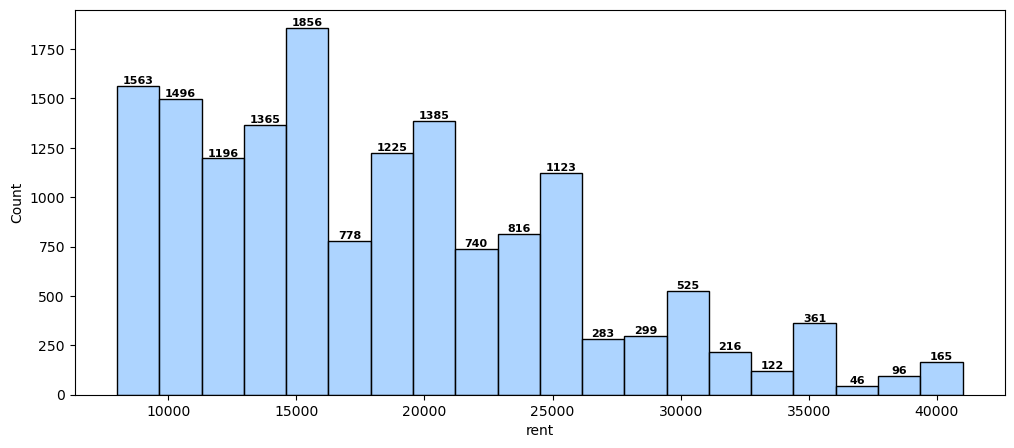

In [50]:
plt.figure(figsize=(12,5))
ax = sns.histplot(data=train_data1, x= 'rent',bins=20,stat='count')
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontsize=8, fontweight='bold')

# Bivarient

<Axes: xlabel='latitude', ylabel='longitude'>

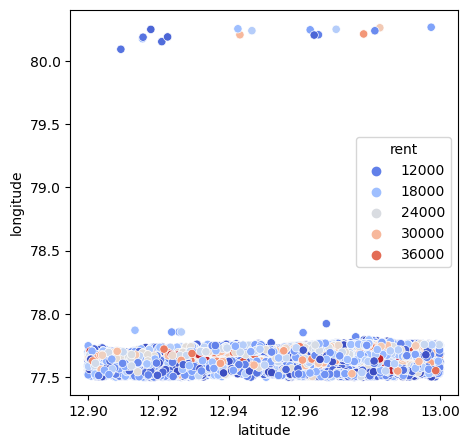

In [51]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='latitude',y='longitude',data=train_data1,hue='rent',palette='coolwarm')

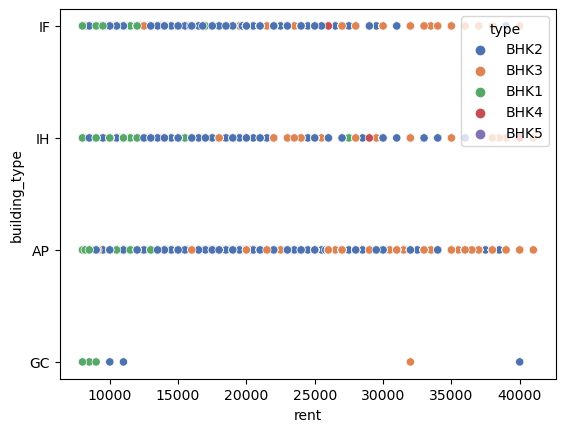

In [52]:
bx=sns.scatterplot(x = 'rent',y ='building_type' ,hue = 'type',palette="deep",data = train_data1)
plt.show()

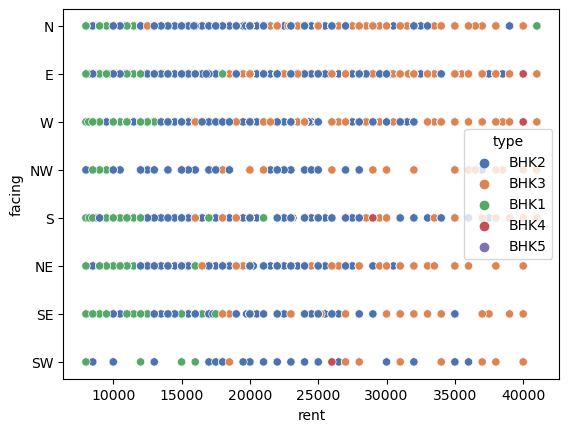

In [53]:
bx=sns.scatterplot(x = 'rent',y ='facing' ,hue = 'type',palette="deep",data = train_data1)
plt.show()

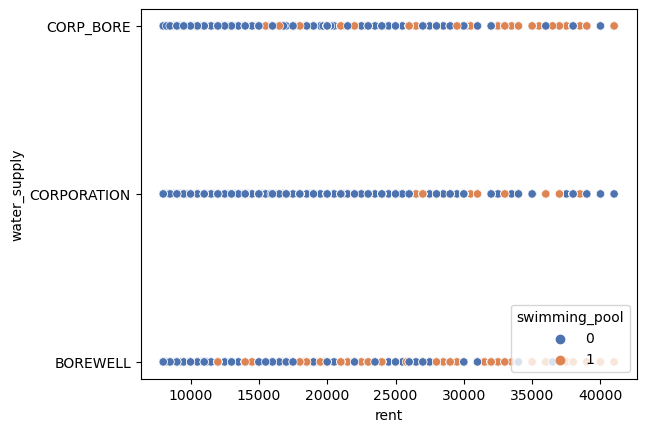

In [54]:
bx=sns.scatterplot(x = 'rent',y ='water_supply' ,hue = 'swimming_pool',palette="deep",data = train_data1)
plt.show()

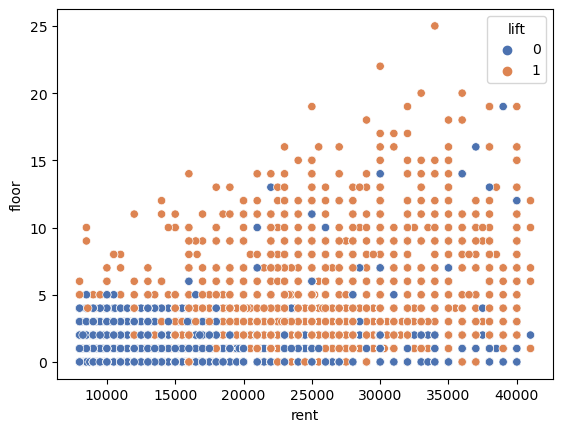

In [55]:
bx=sns.scatterplot(x = 'rent',y ='floor' ,hue = 'lift',palette="deep",data = train_data1)
plt.show()

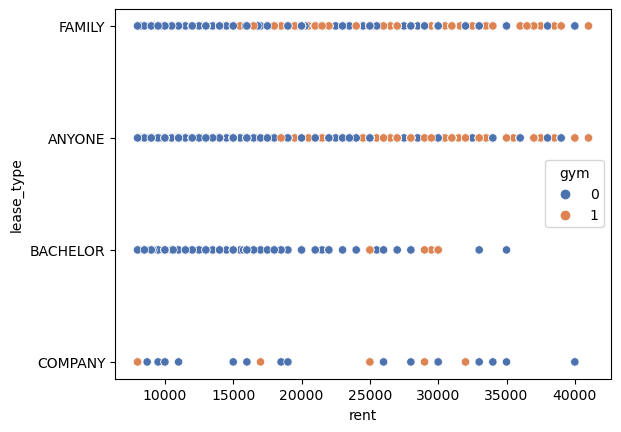

In [57]:
bx=sns.scatterplot(x = 'rent',y ='lease_type' ,hue = 'gym',palette="deep",data = train_data1)

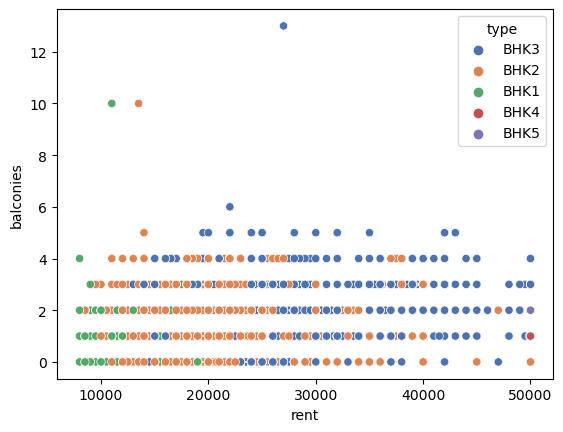

In [133]:
bx=sns.scatterplot(x = 'rent',y ='balconies' ,hue = 'type',palette="deep",data = train_data1)

<Figure size 6000x6000 with 0 Axes>

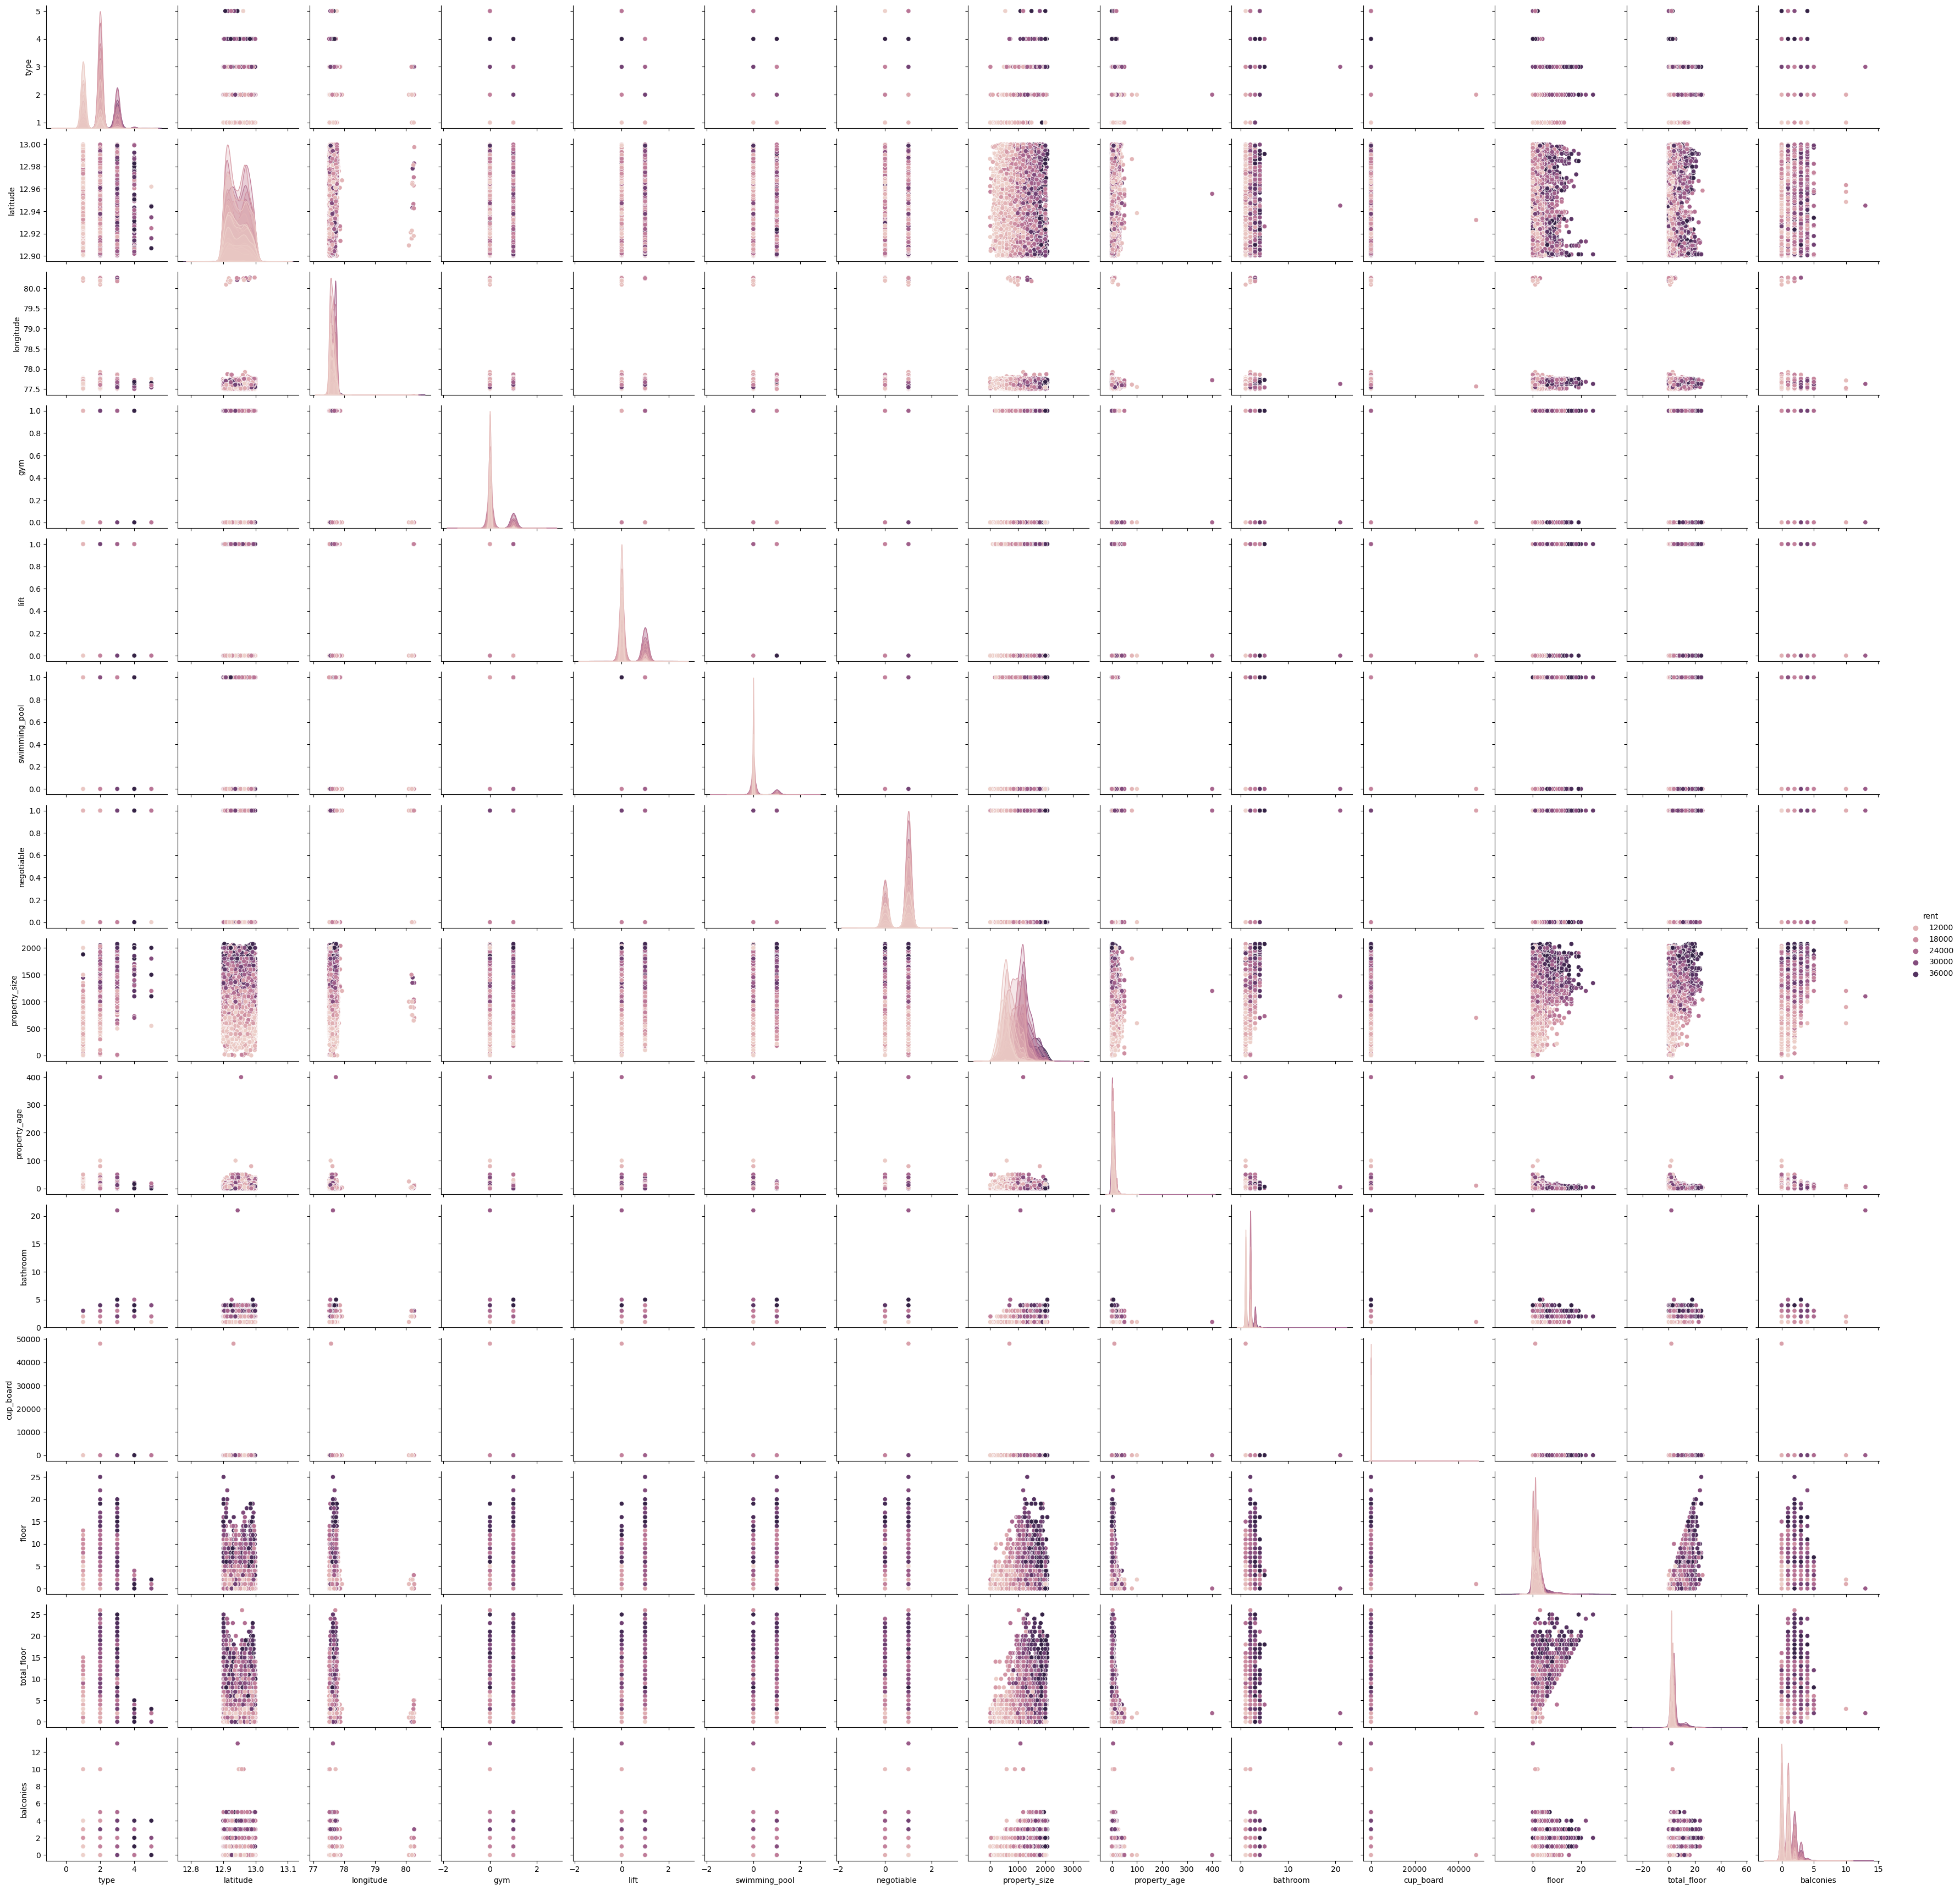

In [114]:
plt.figure(figsize=(60,60))
sns.pairplot(data=train_data1,hue='rent')

# modelling

# ColumnTransformer

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [80]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15656 entries, 6382 to 19587
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           15656 non-null  int64  
 1   latitude       15656 non-null  float64
 2   longitude      15656 non-null  float64
 3   lease_type     15656 non-null  object 
 4   gym            15656 non-null  int64  
 5   lift           15656 non-null  int64  
 6   swimming_pool  15656 non-null  int64  
 7   negotiable     15656 non-null  int64  
 8   furnishing     15656 non-null  object 
 9   parking        15656 non-null  object 
 10  property_size  15656 non-null  int64  
 11  property_age   15656 non-null  float64
 12  bathroom       15656 non-null  float64
 13  facing         15656 non-null  object 
 14  cup_board      15656 non-null  float64
 15  floor          15656 non-null  float64
 16  total_floor    15656 non-null  float64
 17  water_supply   15656 non-null  object 
 18  bui

In [73]:
train_data1['type'].replace(['BHK3', 'BHK2', 'BHK1','BHK4', 'BHK5'],
                        [3,2,1,4,5], inplace=True)

In [83]:
train_data1['type'].unique()

array([2, 3, 1, 4, 5], dtype=int64)

In [89]:
num_column=["type","latitude","longitude","gym","lift","swimming_pool","negotiable",
          "property_size","property_age","bathroom",
            "cup_board","floor","total_floor",
           "balconies"]
cat_column=["lease_type","furnishing","parking","facing","water_supply","building_type"]

In [90]:
X=train_data1.drop(["rent"],axis=1)
y=train_data1['rent']

In [91]:
train_data1

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent
6382,2,12.972959,77.655787,FAMILY,0,0,0,0,NOT_FURNISHED,TWO_WHEELER,...,10.0,2.0,N,0.0,1.0,2.0,CORP_BORE,IF,2.0,15000.0
14027,2,12.908731,77.548584,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,...,10.0,1.0,E,2.0,0.0,1.0,CORP_BORE,IH,0.0,16000.0
15924,2,12.975548,77.531389,FAMILY,0,0,0,1,SEMI_FURNISHED,NONE,...,15.0,1.0,N,2.0,0.0,2.0,CORPORATION,IF,0.0,18000.0
12239,2,12.904746,77.553595,ANYONE,0,0,0,0,SEMI_FURNISHED,BOTH,...,3.0,2.0,N,2.0,1.0,3.0,CORPORATION,IF,2.0,14000.0
17154,2,12.908183,77.562454,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,...,0.0,1.0,E,1.0,2.0,3.0,CORPORATION,IF,1.0,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,1,12.919747,77.515315,FAMILY,0,0,0,0,SEMI_FURNISHED,TWO_WHEELER,...,5.0,1.0,E,1.0,2.0,2.0,CORP_BORE,IF,1.0,9500.0
12256,2,12.979163,77.752210,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,3.0,2.0,E,2.0,2.0,2.0,CORPORATION,IF,1.0,14000.0
6956,3,12.987950,77.549151,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,...,12.0,2.0,E,3.0,1.0,3.0,CORPORATION,IF,3.0,32000.0
11063,2,12.990535,77.670389,FAMILY,0,0,0,0,SEMI_FURNISHED,BOTH,...,5.0,2.0,E,2.0,0.0,1.0,CORPORATION,IH,0.0,13000.0


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123) 

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11742, 20)
(3914, 20)
(11742,)
(3914,)


In [94]:
ohe = OneHotEncoder(min_frequency = 10)
ss = StandardScaler()
ct = make_column_transformer(
    (ohe, cat_column),
    (ss, num_column))

In [95]:
ct

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(min_frequency=10),
                                 ['lease_type', 'furnishing', 'parking',
                                  'facing', 'water_supply', 'building_type']),
                                ('standardscaler', StandardScaler(),
                                 ['type', 'latitude', 'longitude', 'gym',
                                  'lift', 'swimming_pool', 'negotiable',
                                  'property_size', 'property_age', 'bathroom',
                                  'cup_board', 'floor', 'total_floor',
                                  'balconies'])])

In [96]:
Z_train=ct.fit_transform(X_train)
Z_test = ct.transform(X_test)

In [97]:
# Instantiating Linear Regression
lr = LinearRegression()
# Running a fit on train data
lr.fit(Z_train, y_train)

LinearRegression()

In [98]:
# Train score
lr_train_score = lr.score(Z_train, y_train)
print(f'The train score is {lr_train_score}.')

The train score is 0.6595545621382498.


In [99]:
# Test score
lr_test_score = lr.score(Z_test, y_test)
print(f'The test score is {lr_test_score}.')

The test score is 0.6644876523914129.


In [100]:
# Linear Regression Root Mean Squared Error
y_test_preds_lr = lr.predict(Z_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_lr))
print(f'The root mean squared error is {lr_rmse}.')

The root mean squared error is 4368.2506969380565.


r-squared = 0.6645


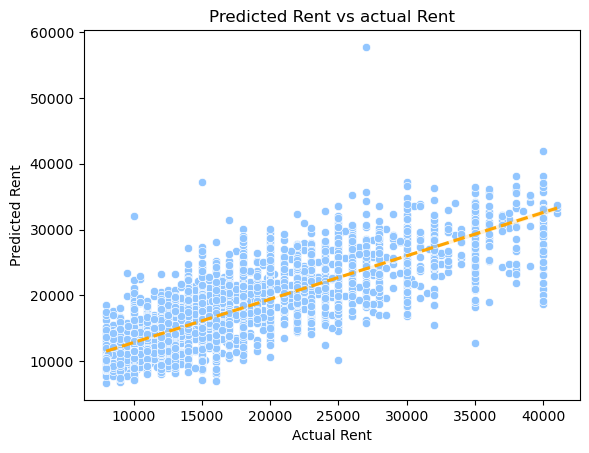

In [102]:
# Create the output DataFrame
output_df = pd.DataFrame({"Actual rent": y_test, "Predicted rent": y_test_preds_lr})

# Plot using Seaborn scatterplot
sns.scatterplot(data=output_df, x="Actual rent", y="Predicted rent")

# Plot the regression line
sns.regplot(data=output_df, x="Actual rent", y="Predicted rent", scatter=False, color="orange", line_kws={'linestyle': 'dashed'})

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Predicted Rent vs actual Rent')

# Calculate and print the r-squared value
r_squared = r2_score(y_test, y_test_preds_lr)
plt.annotate(f"r-squared = {r_squared:.3f}", (1, 1))
print("r-squared = {:.4f}".format(r2_score(y_test, y_test_preds_lr)))#
plt.show()

# Regression using statsmodels

In [103]:
X = train_data1[num_column]

X = sm.add_constant(X)
y = train_data1['rent']
ols = sm.OLS(y, X).fit()

In [104]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1994.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:36:23   Log-Likelihood:            -1.5366e+05
No. Observations:               15656   AIC:                         3.074e+05
Df Residuals:                   15641   BIC:                         3.075e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.518e+05    2.8e+04    -12.551      0.000   -4.07e+05   -2.97e+05
type           1493.0748     94.292     15.835      0.000    1308.251    1677.898
latitude       4014.5672   1230.262      3.263      0.001    1603.112    6426.022
longitude      3881.8462    340.317     11.407      0.000    3214.785    4548.907
gym             293.4055    145.539      2.016      0.044       8.131     578.680
lift            872.9920    110.589      7.894      0.000     656.225    1089.759
swimming_pool   844.8917    155.932      5.418      0.000     539.247    1150.536
negotiable      307.9390     78.292      3.933      0.000     154.479     461.400
property_size     7.7044      0.171     45.039      0.000       7.369       8.040
property_age     75.9928      5.661     13.425      0.000      64.897      87.088
bathroom       1593.7893     86.113     18.508      0.000    1424.998    1762.581
cup_board         0.0429      0.092      0.465      0.642      -0.138       0.224
floor            66.8694     23.850      2.804      0.005      20.120     113.619
total_floor     423.5524     18.541     22.844      0.000     387.209     459.895
balconies       227.7453     46.719      4.875      0.000     136.170     319.320
==============================================================================
Omnibus:                     1523.082   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2881.045
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                     8.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# Instantiating Linear Regression
lr = LinearRegression()
# Creating a pipeline that starts off with the column transformer, followed by the LinearRegression
lr_pipe = make_pipeline(ct, lr)

In [106]:
lr_pipe.fit(X_train, y_train)
# Linear Regression Scores
print(f"The train score is: {lr_pipe.score(X_train, y_train)}")
print(f"The test score is: {lr_pipe.score(X_test, y_test)}")

y_test_preds_lr = lr_pipe.predict(X_test)

# Linear Regression Root Mean Squared Error
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_lr))
print(f'The root mean squared error is {lr_rmse}.')

The train score is: 0.6595545621382498
The test score is: 0.6644876523914129
The root mean squared error is 4368.2506969380565.


# Ridge Regression

In [107]:
# Setting alpha range
r_alphas = np.logspace(-2, 1, 100)
# Instantiating Linear Regression
ridge = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
# Creating a pipeline that starts off with the column transformer, followed by the RidgeCV
ridge_pipe = make_pipeline(ct, ridge)

In [108]:
ridge_pipe.fit(X_train, y_train)
print(f"The train score is: {ridge_pipe.score(X_train, y_train)}")
print(f"The test score is: {ridge_pipe.score(X_test, y_test)}")

# RidgeCV Scores
y_test_preds_ridge = ridge_pipe.predict(X_test)

# RidgeCV Root Mean Squared Error
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_ridge))
print(f'The root mean squared error is {ridge_rmse}.')

The train score is: 0.6595263488333984
The test score is: 0.6643167656018588
The root mean squared error is 4369.362997746401.


In [ ]:
There is very little difference between the RidgeCV score and Linear Regression score in terms of the R2 and RMSE.
Let us see the LassoCV score.

#  LassoCV

In [ ]:
Similar to the Ridge regression, the Lasso regression aims to reduce overfitting and 
increase the generalisation ability of the model. The main difference between the two is the type of penalty they impose, 
causeing different effects on the coefficient estimates.


In [109]:
# Setting alpha range
l_alphas = np.logspace(-20, 5, 25)
#l_alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
# Instantiating Linear Regression
lasso = LassoCV(alphas=l_alphas, cv=5, max_iter=10000, tol=1e-1)
# Creating a pipeline that starts off with the column transformer, followed by the LassoCV
lasso_pipe = make_pipeline(ct, lasso)

In [110]:
lasso_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(min_frequency=10),
                                                  ['lease_type', 'furnishing',
                                                   'parking', 'facing',
                                                   'water_supply',
                                                   'building_type']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['type', 'latitude',
                                                   'longitude', 'gym', 'lift',
                                                   'swimming_pool',
                                                   'negotiable',
                                                   'property_size',
                                                   'property_age', 'bathroom',
                                                   'cu...
                 LassoCV(alphas=array([1.00000000e-20, 1.10069417e-19, 1.21152766e-18, 1.33352143e-17,
       1.46779927e-16, 1.61559810e-15, 1.77827941e-14, 1.95734178e-13,
       2.15443469e-12, 2.37137371e-11, 2.61015722e-10, 2.87298483e-09,
       3.16227766e-08, 3.48070059e-07, 3.83118685e-06, 4.21696503e-05,
       4.64158883e-04, 5.10896977e-03, 5.62341325e-02, 6.18965819e-01,
       6.81292069e+00, 7.49894209e+01, 8.25404185e+02, 9.08517576e+03,
       1.00000000e+05]),
                         cv=5, max_iter=10000, tol=0.1))])

In [111]:
lasso_pipe.fit(X_train, y_train)
print(f"The train score is: {lasso_pipe.score(X_train, y_train)}")
print(f"The test score is: {lasso_pipe.score(X_test, y_test)}")

# LassoCV Scores
y_test_preds_lasso = lasso_pipe.predict(X_test)

# LassoCV Root Mean Squared Error
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_lasso))
print(f'The root mean squared error is {lasso_rmse}.')

The train score is: 0.6588200472924888
The test score is: 0.6630658021352982
The root mean squared error is 4377.496902042573.


In [112]:
lasso.alpha_

6.81292069057965

# Overall, the baseline linear regression model and ridge regression has the best performance in terms of R2 score and Root Mean Squared Error.

In [ ]:
# Save the model to a file
with open('smarthouse_rent_prediction_project.pkl', 'wb') as file:
    pickle.dump(lr, file)
